# Análise exploratória dos dados de bolsas de fomento internacionais oferecidos pelas CAPES

## 1. Introdução

Bolsas - Coordenação de Aperfeiçoamento de Pessoal de Nível Superior (CAPES)

Divulgação das atividades de fomento a bolsas de estudos no Brasil e no exterior de programas de mobilidade internacional registradas em sistemas de pagamentos informatizados da Capes. O acervo de dados disponibilizado apresenta possibilidade de recortes por variáveis geográficas, perfil dos bolsistas, áreas de conhecimento e evolução dos valores pagos ao longo da série histórica.

Dataset: https://basedosdados.org/dataset/br-capes-bolsas?bdm_table=mobilidade_internacional

Cobertura temporal: Jan/2005 à Dez/2019

Esse estudo tem com objetivo buscar as respostas para as seguintes perguntas, dividido em duas partes:

Parte 1:

- Quais as grandes áreas de conhecimento e quais os cursos que mais tiveram alunos beneficiados?
- Quais foram os níveis de ensino que mais receberam bolsas?
- Quais foram os programas que mais foram financiadas?
- Quais as universidades com maior número de alunos beneficiados?

Parte 2:

- De qual região são os alunos? (criar um mapa de calor dos estados brasileiros)
- Quais os países que mais receberam alunos do Brasil?
- Qual foi o gasto durante todo esse período de 2005 à 2019? (série temporal)
- Qual a diferença de genêro entre os beneficiários? (Por conta de não ter uma coluna específica, no momento essa análise não será realizada. Futuramente prentendo aplicar alguma técnica NLP para definir os gêneros a partir de nomes)

Obs.: a parte 2 do projeto ainda não foi construída. Em breve será atualizada e todas as perguntas serão respondidas.

## 2. Instalando pacotes necessários e carregando bibliotecas

In [1]:
pip install basedosdados

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install google-api-core

Note: you may need to restart the kernel to use updated packages.


In [3]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_capes_bolsas', table_id='mobilidade_internacional', billing_project_id="bolsas-capes-2005-2019")

pd.set_option('display.max_columns', None) # Função para mostrar todas as colunas

Downloading: 100%|█████████████████████████████████████████████████████████| 146036/146036 [01:17<00:00, 1892.95rows/s]


## 3. Tratando os dados

A tabela original possui dados sensíveis, uma parte do cpf e o nome completo de cada beneficiário (até encontrei informações pessoais do intercâmbio que fiz!)

Por conta disso, irei retirar as colunas "cpf" e "beneficiario".

Ressaltando que os dados não possuem distinção de gênero, nesse momento não irei realizar uma análise disso. Futuramente pretendo realizar um estudo em que a partir do primeiro nome, me traga um resultado de gênero.

In [4]:
colunas_retiradas = ['cpf', 'beneficiario']

bolsas_capes = df.copy() # copiando o dataframe para manipular sem alterar o original

bolsas_capes = bolsas_capes.drop(colunas_retiradas, axis=1)

In [5]:
bolsas_capes.head()

,ano_inicial,mes_inicial,ano_final,mes_final,id_processo_concessao,programa_capes,pais_destino,sigla_moeda,area_avaliacao,area_conhecimento,grande_area_conhecimento,nivel_ensino,uf_instituicao_origem,instituicao_ensino_origem,instituicao_ensino_principal,instituicao_ensino,deducao_mensalidade_programa_atracao_jovens,valor_adicional_pagos_doutorado_pleno_dependentes,valor_auxilio_deslocamento,valor_auxilio_deslocamento_demanda,valor_auxilio_deslocamento_pesquisa,valor_auxilio_deslocamento_retorno,valor_auxilio_despesas_instalacao,valor_auxilio_instalacao_dependente,valor_auxilio_instalacao,valor_auxilio_seguro_saude_anual,valor_auxilio_seguro_saude_capes_setec,valor_auxilio_seguro_saude_demanda,valor_auxilio_seguro_saude_dependente,valor_auxilio_seguro_saude,valor_auxilio_moradia,valor_auxilio_material_didatico,valor_recebido_bolsa,valor_recebido_adicional_localidade,valor_recebido_ajuda_custo,valor_recebido_ajuda_custo_capes_mtur,valor_recebido_ajuda_custo_capes_setec,valor_recebido_custeio_taxas_escolares_menores,valor_recebido_reembolso_taxas_escolares,valor_recebido_custeio_taxas_escolares,valor_recebido_despesas_adicional_dependente,valor_recebido_despesas_auxilio_deslocamento,valor_recebido_despesas_extraordinarias,valor_recebido_despesas_mensalidade,valor_recebido_despesas_seguro_saude,valor_recebido_seguro_saude,valor_recebido_diarias,valor_recebido_escola_altos_estudos,valor_recebido_licenca_maternidade,valor_recebido_mensalidade,valor_recebido_mensalidade_agendadas,valor_recebido_mensalidade_demanda,valor_recebido_outros_debitos,valor_recebido_passagem_aerea,valor_recebido_capital,valor_recebido_total
0,2005,4,2010,3,1898-04-3,DAAD,ALEMANHA,EUR,None,None,ENGENHARIAS,DOUTORADO PLENO,SÃO PAULO,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,TECHNISCHE UNIVERSITÄT DARMSTADT,TECHNISCHE UNIVERSITÄT DARMSTADT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0
1,2005,9,2010,3,2725-04-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,GBP,None,None,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,SÃO PAULO,FUNDAÇÃO GETÚLIO VARGAS,UNIVERSITY OF WARWICK,UNIVERSITY OF WARWICK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2730.0
2,2006,11,2010,10,3951-05-7,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,FRANÇA,EUR,None,None,"LINGÜÍSTICA, LETRAS E ARTES",DOUTORADO PLENO,RIO DE JANEIRO,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,UNIVERSITÉ PARIS NORD - PARIS XIII,UNIVERSITÉ PARIS NORD - PARIS XIII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,11,2010,10,4267-05-2,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,HOLANDA,EUR,None,None,"LINGÜÍSTICA, LETRAS E ARTES",DOUTORADO PLENO,SÃO PAULO,UNIVERSIDADE DE SÃO PAULO,VRIJE UNIVERSITEIT AMSTERDAM,VRIJE UNIVERSITEIT AMSTERDAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,11,2010,10,4008-05-7,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,HOLANDA,EUR,None,None,CIÊNCIAS HUMANAS,DOUTORADO PLENO,PERNAMBUCO,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UNIVERSITEIT LEIDEN,UNIVERSITEIT LEIDEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800.0


In [6]:
print('O dataframe possui {} linhas duplicadas.'.format(bolsas_capes.duplicated().sum()))    

O dataframe possui 64 linhas duplicadas.


In [7]:
# Retirando os dados duplicados

bolsas_capes = bolsas_capes.drop_duplicates(keep='first') # Nesse caso, preferi não utilizar o 'inplace=True' 

print('O dataframe possui {} linhas duplicadas.'.format(bolsas_capes.duplicated().sum()))

O dataframe possui 0 linhas duplicadas.


In [8]:
print('Esse dataframe contém {} linhas e {} colunas.'.format(bolsas_capes.shape[0], bolsas_capes.shape[1]))

Esse dataframe contém 145972 linhas e 56 colunas.


In [9]:
# Obtendo informações do dataframe

bolsas_capes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145972 entries, 0 to 146035
Data columns (total 56 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ano_inicial                                        145972 non-null  Int64  
 1   mes_inicial                                        145972 non-null  Int64  
 2   ano_final                                          145972 non-null  Int64  
 3   mes_final                                          145972 non-null  Int64  
 4   id_processo_concessao                              145972 non-null  object 
 5   programa_capes                                     145972 non-null  object 
 6   pais_destino                                       145972 non-null  object 
 7   sigla_moeda                                        145972 non-null  object 
 8   area_avaliacao                                     130097 non-null  object

In [10]:
bolsas_capes.isnull().sum()

ano_inicial                                               0
mes_inicial                                               0
ano_final                                                 0
mes_final                                                 0
id_processo_concessao                                     0
programa_capes                                            0
pais_destino                                              0
sigla_moeda                                               0
area_avaliacao                                        15875
area_conhecimento                                     28774
grande_area_conhecimento                               5234
nivel_ensino                                              0
uf_instituicao_origem                                  3586
instituicao_ensino_origem                              2872
instituicao_ensino_principal                         120091
instituicao_ensino                                        8
deducao_mensalidade_programa_atracao_jov

Há diversos valores nulos nas colunas "valor_recebido_..." pois cada programa conta com auxílios distintos.

Também observei que a coluna 'valor_recebido_total' é o total que cada beneficiário recebeu. Entretanto há 10576 valores nulos, e olhando a tabela (não toda), percebi que essa coluna nem sempre está trazendo a somatória dos valores das outras colunas. 

Por conta disso, resolvi somar todos os valores que os beneficiários receberam (desde 'deducao_mensalidade_programa_atracao_jovens' até 'valor_recebido_capital ' e armazenar na coluna 'valor_recebido_total')

In [11]:
# Criando uma nova coluna para armazenar o valor total recebido (para efeitos de comparação)

bolsas_capes['valor_recebido_total'] = bolsas_capes.iloc[:, 16:-1].sum(axis=1)

bolsas_capes.head()

,ano_inicial,mes_inicial,ano_final,mes_final,id_processo_concessao,programa_capes,pais_destino,sigla_moeda,area_avaliacao,area_conhecimento,grande_area_conhecimento,nivel_ensino,uf_instituicao_origem,instituicao_ensino_origem,instituicao_ensino_principal,instituicao_ensino,deducao_mensalidade_programa_atracao_jovens,valor_adicional_pagos_doutorado_pleno_dependentes,valor_auxilio_deslocamento,valor_auxilio_deslocamento_demanda,valor_auxilio_deslocamento_pesquisa,valor_auxilio_deslocamento_retorno,valor_auxilio_despesas_instalacao,valor_auxilio_instalacao_dependente,valor_auxilio_instalacao,valor_auxilio_seguro_saude_anual,valor_auxilio_seguro_saude_capes_setec,valor_auxilio_seguro_saude_demanda,valor_auxilio_seguro_saude_dependente,valor_auxilio_seguro_saude,valor_auxilio_moradia,valor_auxilio_material_didatico,valor_recebido_bolsa,valor_recebido_adicional_localidade,valor_recebido_ajuda_custo,valor_recebido_ajuda_custo_capes_mtur,valor_recebido_ajuda_custo_capes_setec,valor_recebido_custeio_taxas_escolares_menores,valor_recebido_reembolso_taxas_escolares,valor_recebido_custeio_taxas_escolares,valor_recebido_despesas_adicional_dependente,valor_recebido_despesas_auxilio_deslocamento,valor_recebido_despesas_extraordinarias,valor_recebido_despesas_mensalidade,valor_recebido_despesas_seguro_saude,valor_recebido_seguro_saude,valor_recebido_diarias,valor_recebido_escola_altos_estudos,valor_recebido_licenca_maternidade,valor_recebido_mensalidade,valor_recebido_mensalidade_agendadas,valor_recebido_mensalidade_demanda,valor_recebido_outros_debitos,valor_recebido_passagem_aerea,valor_recebido_capital,valor_recebido_total
0,2005,4,2010,3,1898-04-3,DAAD,ALEMANHA,EUR,None,None,ENGENHARIAS,DOUTORADO PLENO,SÃO PAULO,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,TECHNISCHE UNIVERSITÄT DARMSTADT,TECHNISCHE UNIVERSITÄT DARMSTADT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0
1,2005,9,2010,3,2725-04-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,GBP,None,None,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,SÃO PAULO,FUNDAÇÃO GETÚLIO VARGAS,UNIVERSITY OF WARWICK,UNIVERSITY OF WARWICK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2730.0
2,2006,11,2010,10,3951-05-7,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,FRANÇA,EUR,None,None,"LINGÜÍSTICA, LETRAS E ARTES",DOUTORADO PLENO,RIO DE JANEIRO,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,UNIVERSITÉ PARIS NORD - PARIS XIII,UNIVERSITÉ PARIS NORD - PARIS XIII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0
3,2006,11,2010,10,4267-05-2,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,HOLANDA,EUR,None,None,"LINGÜÍSTICA, LETRAS E ARTES",DOUTORADO PLENO,SÃO PAULO,UNIVERSIDADE DE SÃO PAULO,VRIJE UNIVERSITEIT AMSTERDAM,VRIJE UNIVERSITEIT AMSTERDAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0
4,2006,11,2010,10,4008-05-7,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,HOLANDA,EUR,None,None,CIÊNCIAS HUMANAS,DOUTORADO PLENO,PERNAMBUCO,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UNIVERSITEIT LEIDEN,UNIVERSITEIT LEIDEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800.0


Também pode se observar que os valores não estão em reais. Cada linha possui alguma moeda específica, declarada na coluna 'sigla_moeda'.

Portanto, deve-se converter todos os valores para o mesmo tipo de moeda (reais). 

Para isso, será realizado um cálculo e o resultado será armazenado em uma nova coluna.

## 4. Análise exploratória - Parte 1

Com o dataset pronto, iremos iniciar as análises dos dados

Primeiramente, vamos verificar quais são as áreas que mais tiveram participação nas bolsas de intercâmbio e quais foram as graduações com maior número de bolsistas.

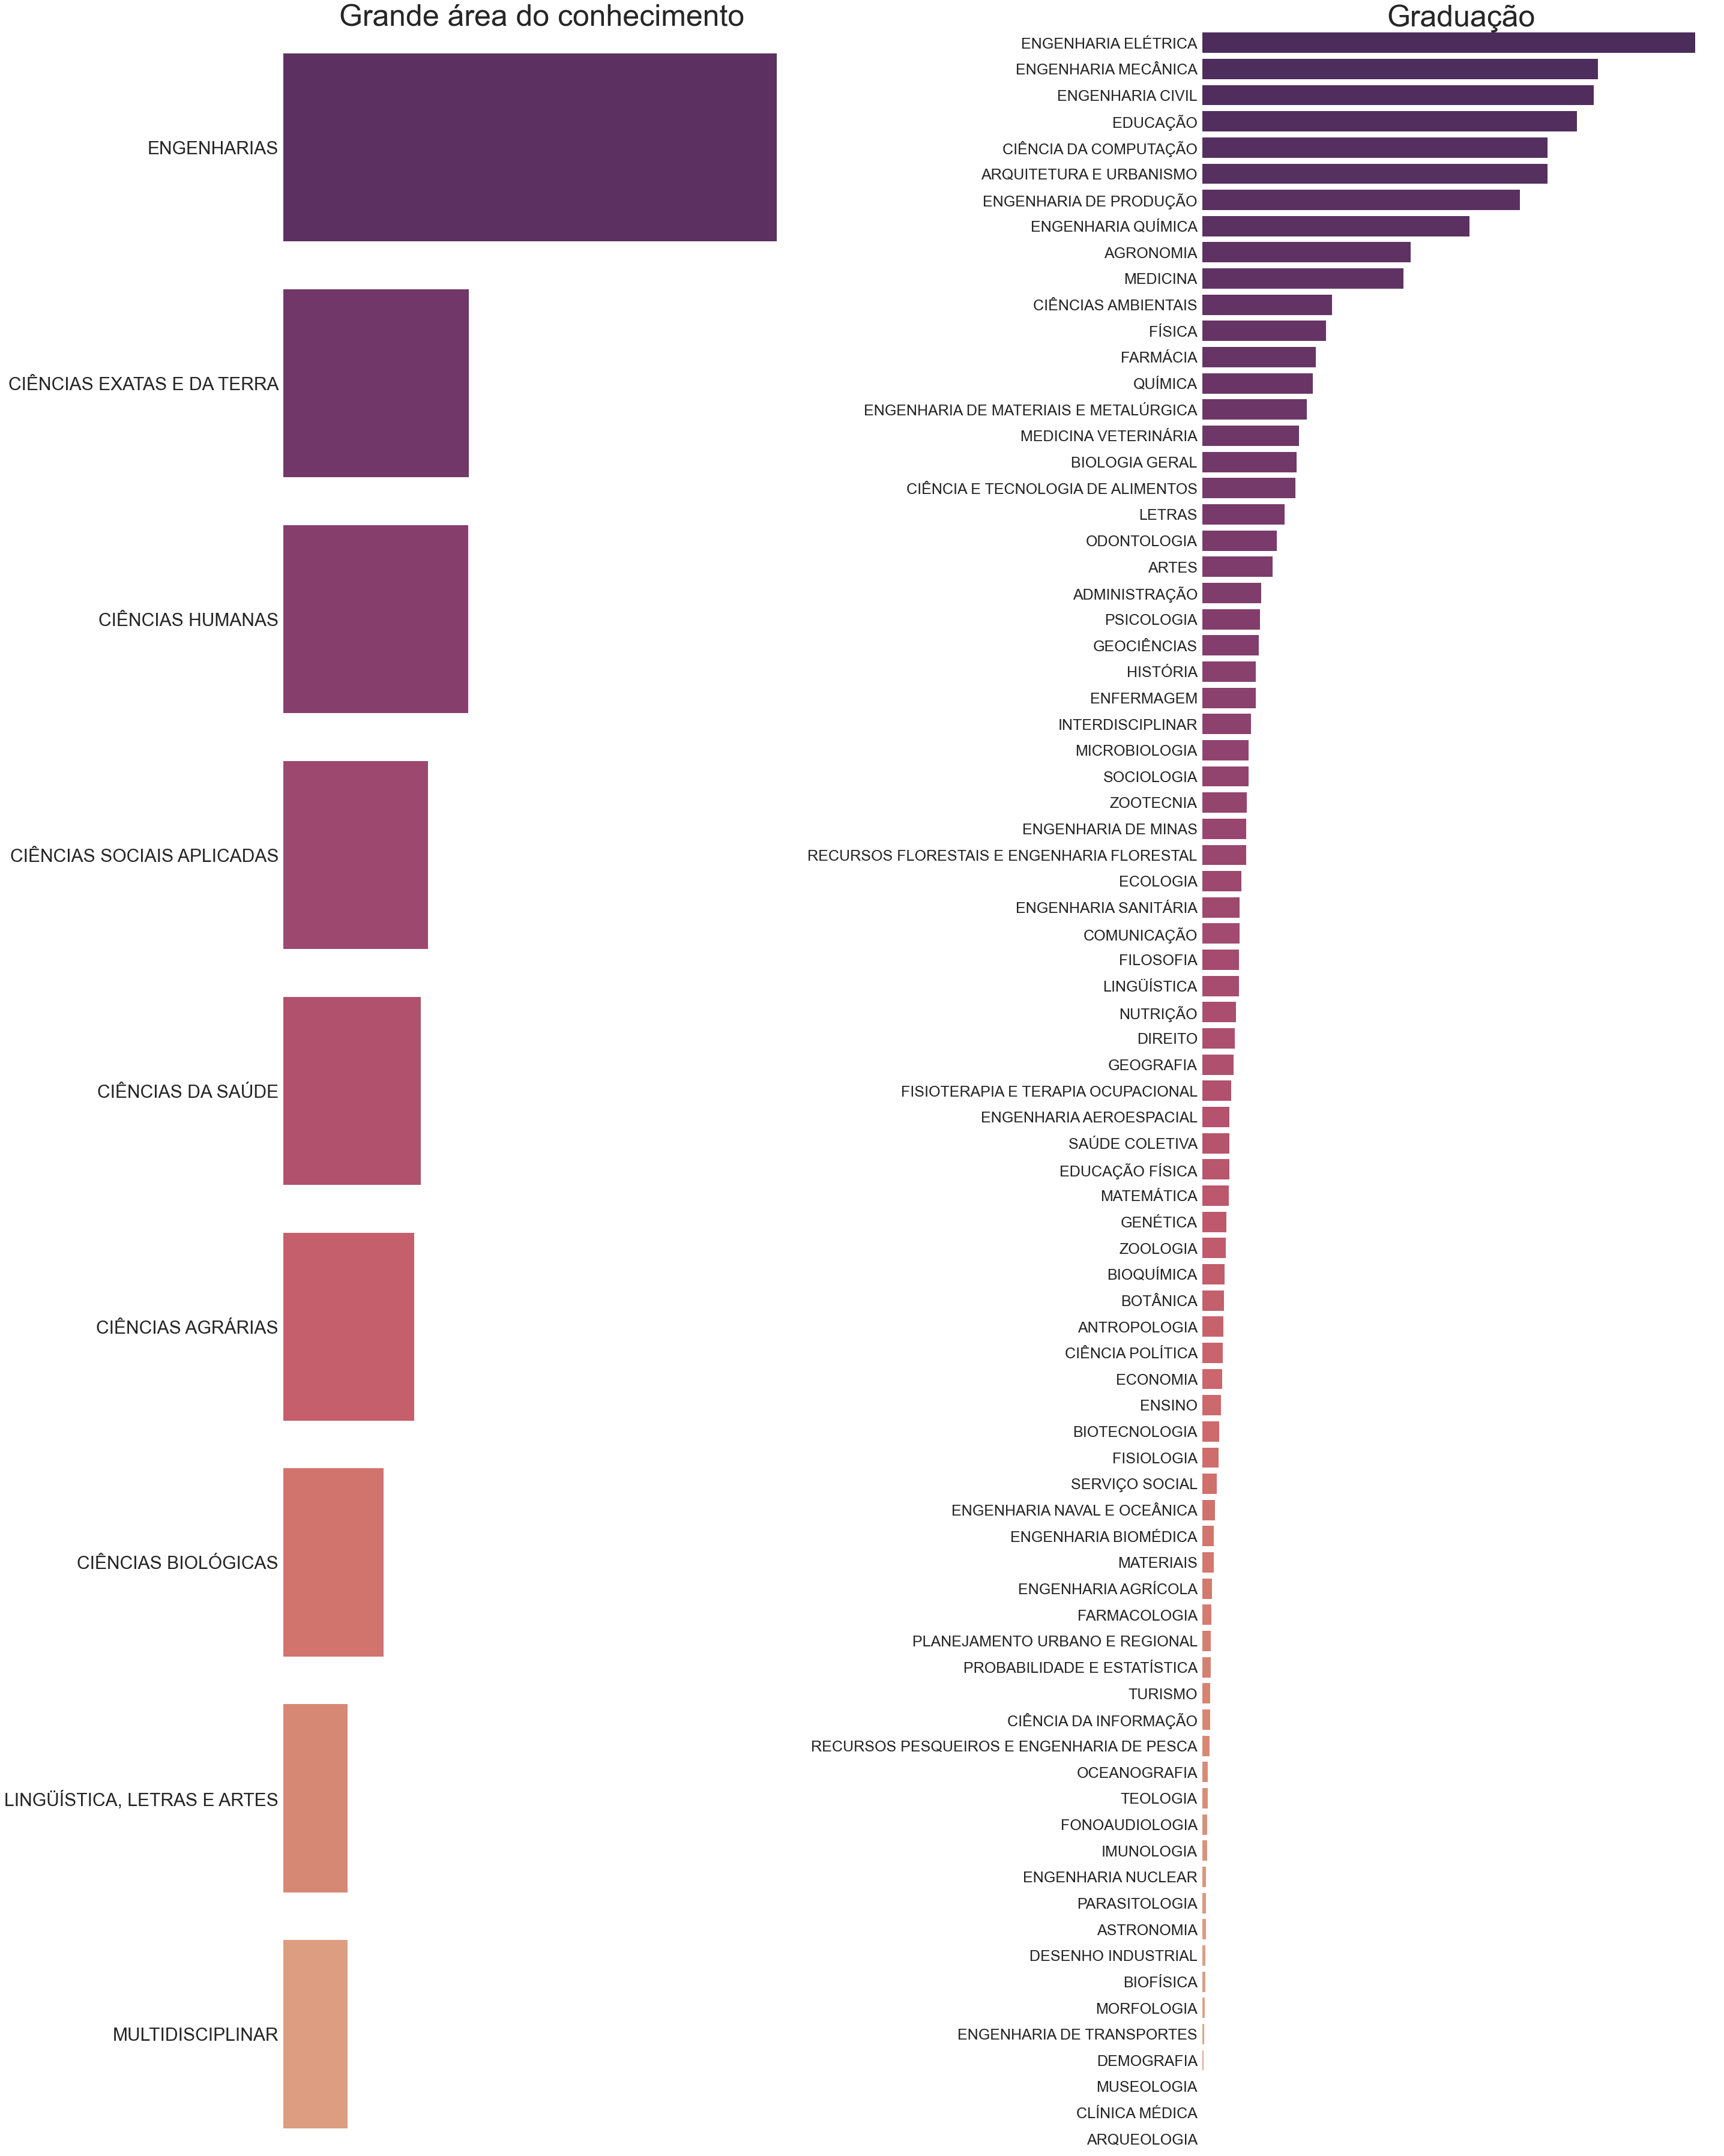

In [203]:
# Definindo os parâmetros comuns dos gráficos
plt.subplots(figsize=(40,50))

customizacao = {
                'axes.spines.right': False, # retirar a borda direita
                'axes.spines.top': False, # retirar a borda de cima
                'axes.spines.left': False, # retirar a borda esquerda
                'axes.spines.bottom': False, # retirar a borda de baixo
                }
sns.set_style(style="white", rc=customizacao)


#Gráfico 1 - Grande área de conhecimento:
plt.subplot(1, 2, 1)
sns.countplot(y='grande_area_conhecimento', 
              data=bolsas_capes, 
              order=bolsas_capes.grande_area_conhecimento.value_counts().index, 
              palette="flare_r")
plt.title('Grande área do conhecimento', fontsize=50)
plt.xlabel('') # retirar o label do eixo x
plt.ylabel('') # retirar o label do eixo y
plt.xticks(()) # retirar o eixo x
plt.tick_params(labelsize=30) # mudando tamanho dos labels de cada barra

#Gráfico 2 - Graduação:
plt.subplot(1, 2, 2)
sns.countplot(y='area_conhecimento', 
              data=bolsas_capes, 
              order=bolsas_capes.area_conhecimento.value_counts().index, 
              palette="flare_r")
plt.title('Graduação', fontsize=50)
plt.xlabel('') # retirar o label do eixo x
plt.ylabel('') # retirar o label do eixo y
plt.xticks(()) # retirar o eixo x
plt.tick_params(labelsize=25) # mudando tamanho dos labels de cada barra

plt.tight_layout(); #otimizar espaço dos gráficos
plt.show()

Podemos observar pelos gráficos acima que a maior área de conhecimento fomentada é a engenharia e as três maiores graduações que recebem o auxílio são: engenharia elétrica, engenharia mecânica e engenharia civil.

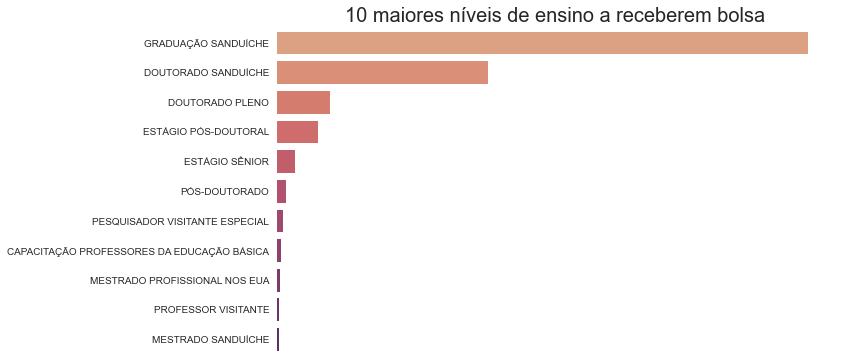

In [204]:
plt.figure(figsize=(10,6))

sns.countplot(y='nivel_ensino', 
              data=bolsas_capes, 
              order=bolsas_capes.nivel_ensino.value_counts().index[:11],
              palette="flare")
plt.title('10 maiores níveis de ensino a receberem bolsa', fontdict={'fontsize': 20})
plt.xlabel('') # retirar o label do eixo x
plt.ylabel('') # retirar o label do eixo y
plt.xticks(()) # retirar os valores do eixo x
plt.show()

Observa-se que o nível de ensino com a maior quantidade de bolsas oferecidas é a de graduação. Por que será?

In [205]:
bolsas_capes['programa_capes'].value_counts()

GS/CSF - GRADUAÇÃO SANDUÍCHE - PROGRAMA CIÊNCIA SEM FRONTEIRAS                                                          63292
PDSE - PROGRAMA DE DOUTORADO SANDUÍCHE NO EXTERIOR                                                                      24277
BRAFITEC - BRASIL FRANÇA ENGENHARIA TECNOLOGIA                                                                          11278
DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR                                                                            6034
PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR                                                                             4370
PLI - PROGRAMA DE LICENCIATURAS INTERNACIONAIS - PORTUGAL                                                                3602
PDEE - ESTÁGIO DE DOUTORANDO                                                                                             2773
PVE/CSF - PESQUISADOR VISITANTE ESPECIAL - PROGRAMA CIÊNCIA SEM FRONTEIRAS                                            

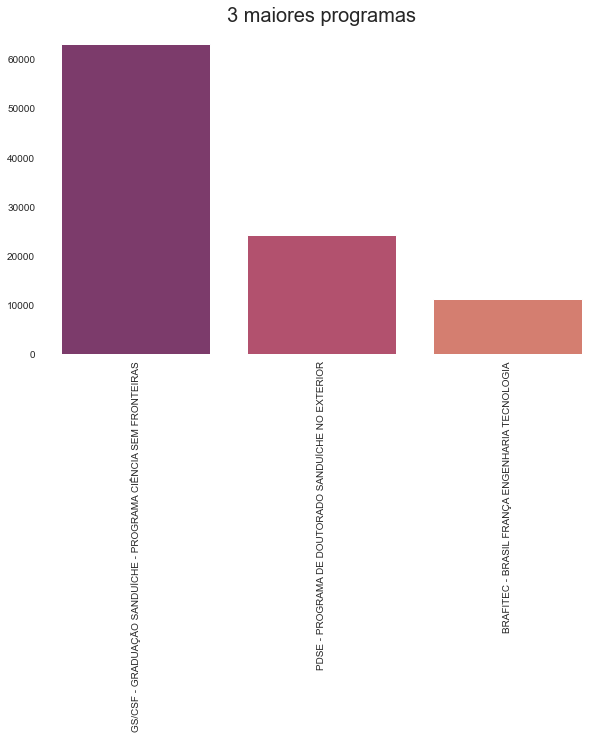

In [206]:
plt.figure(figsize=(10,6))
sns.countplot(x='programa_capes', 
              data=bolsas_capes,order=bolsas_capes.programa_capes.value_counts().index[:3], 
              palette='flare_r')
plt.title('3 maiores programas', fontdict={'fontsize': 20})
plt.xlabel('') # retirar o label do eixo x
plt.ylabel('') # retirar o label do eixo y
plt.xticks(rotation=90)
plt.show()

As informações apresentadas acima mostram que o programa com mais bolsas distribuídas foi o Ciência Sem Fronteiras.
Programa do governo federal criado em 2011, sendo encerrado em 2017, contou com o financiamento de aproximadamente 93 mil bolsas, sendo que por volta de 73% foram destinados ao nível de graduação, condizendo ao estudo realizado.

Mais informações: 
- https://www.estudarfora.org.br/ciencia-sem-fronteiras-acabou-entenda/
- http://portal.mec.gov.br/component/tags/tag/ciencia-sem-fronteiras?start=60
- https://www.gov.br/cnpq/pt-br/acesso-a-informacao/acoes-e-programas/programas/ciencia-sem-fronteiras

In [207]:
pd.set_option('display.max_rows', None)
bolsas_capes['instituicao_ensino_origem'].value_counts()

UNIVERSIDADE DE SÃO PAULO                                                                                              10829
UNIVERSIDADE FEDERAL DE MINAS GERAIS                                                                                    6733
UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL                                                                               5759
UNIVERSIDADE FEDERAL DE SANTA CATARINA                                                                                  5701
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO                                                                                  5561
UNIVERSIDADE ESTADUAL DE CAMPINAS                                                                                       4687
UNIVERSIDADE DE BRASÍLIA                                                                                                4303
UNIVERSIDADE FEDERAL DO PARANÁ                                                                                          3839


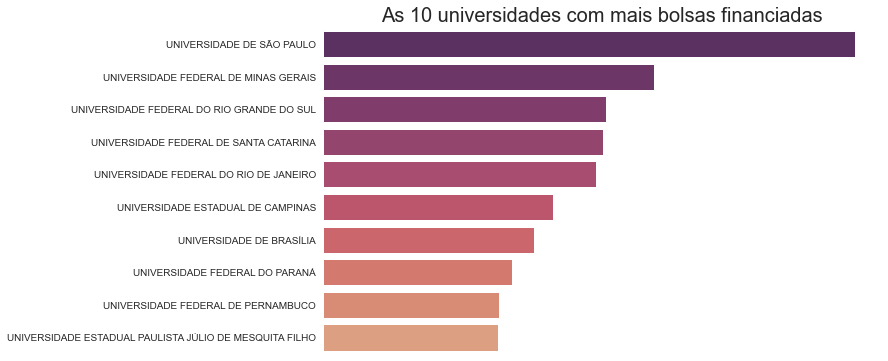

In [208]:
plt.figure(figsize=(10,6))
sns.countplot(y='instituicao_ensino_origem', 
              data=bolsas_capes,order=bolsas_capes.instituicao_ensino_origem.value_counts().index[:10], 
              palette='flare_r')
plt.title('As 10 universidades com mais bolsas financiadas', fontdict={'fontsize': 20})
plt.xlabel('') # retirar o label do eixo x
plt.ylabel('') # retirar o label do eixo y
plt.xticks(()) # retirar os valores do eixo x
plt.show()

Observa-se que a universidade com mais bolsas financiadas foi a USP.

Em 10º lugar ficou a universidade em que estudei, a UNESP.

## 5. Análise exploratória - Parte 2

Em construção...